In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
df=pd.read_csv('insurance.csv')

Expolatory data analysis

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [43]:
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df.sex.replace(('female', 'male'), (1, 0), inplace=True)
#df.region.replace(('southest','northeast','southwest','northwest'),(0,1,2,3),inplace=True)

In [36]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


Visualization

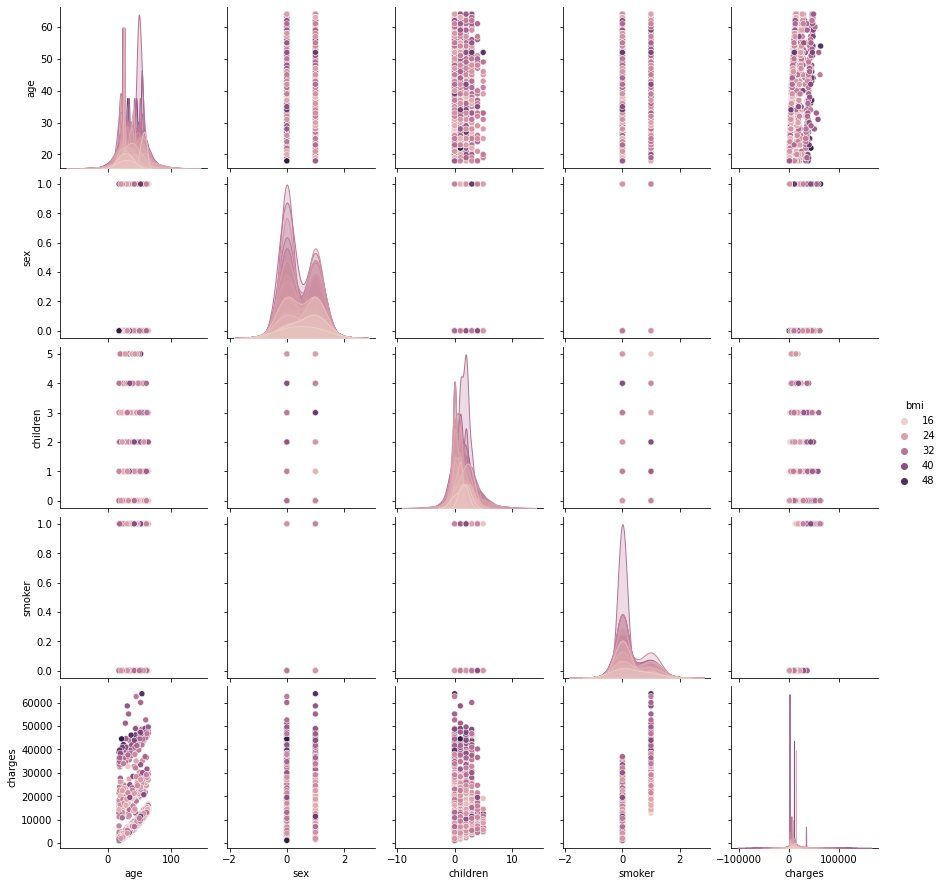

In [37]:
sb.pairplot(df,hue='bmi')

Text(0.5, 1.0, 'Age wise smokers count')

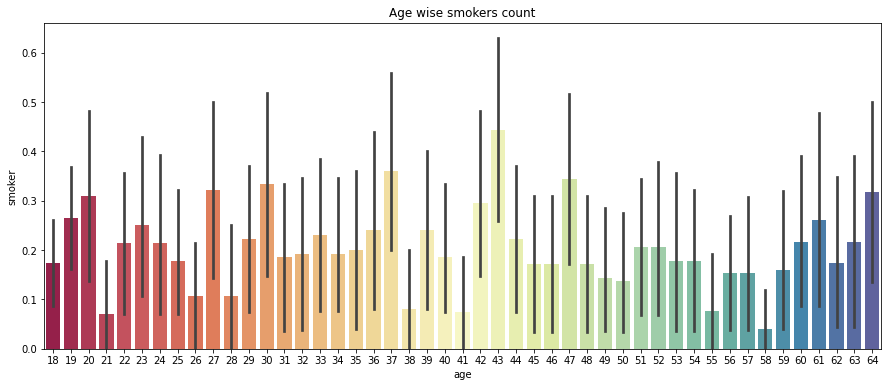

In [38]:
ax= plt.figure(figsize=(15,6))
sb.barplot(x='age', y='smoker', data=df, palette='Spectral' )
plt.title('Age wise smokers count')

Text(0.5, 1.0, 'Showing the distribution of number of children of the patients')

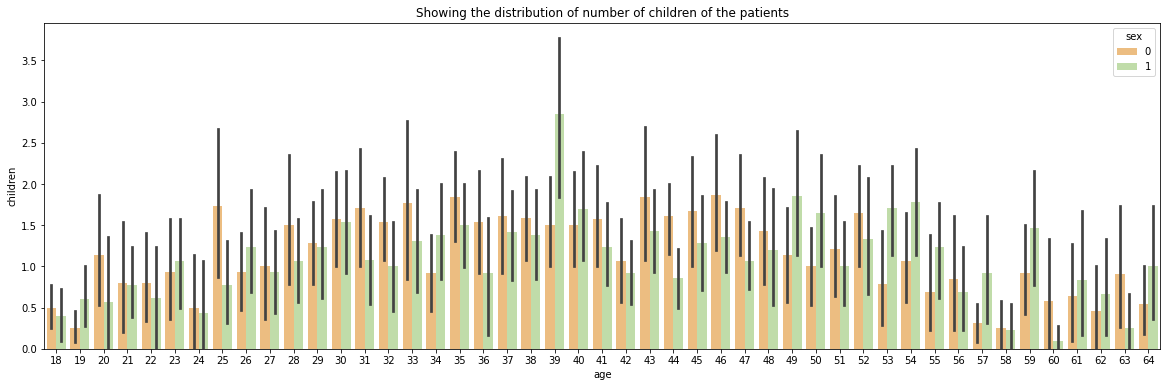

In [39]:
ax= plt.figure(figsize=(20,6))
sb.barplot(x='age', y='children', data=df, palette='Spectral', hue='sex' )
plt.title('Showing the distribution of number of children of the patients')

Text(0.5, 1.0, 'Responsiveness of the medical bill to age')

<Figure size 432x432 with 0 Axes>

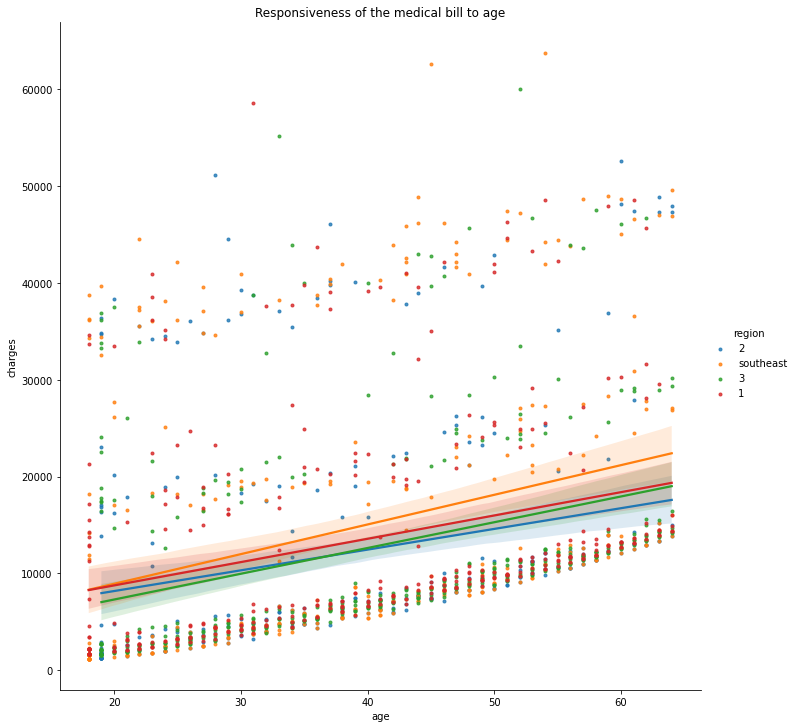

In [40]:
ax= plt.figure(figsize=(6,6))
sb.lmplot(x='age', y= 'charges',data=df,markers='.',hue ='region',height=10,aspect=1)
plt.title('Responsiveness of the medical bill to age')

Text(0.5, 1.0, 'Age wise distribution of BMI')

<Figure size 1080x432 with 0 Axes>

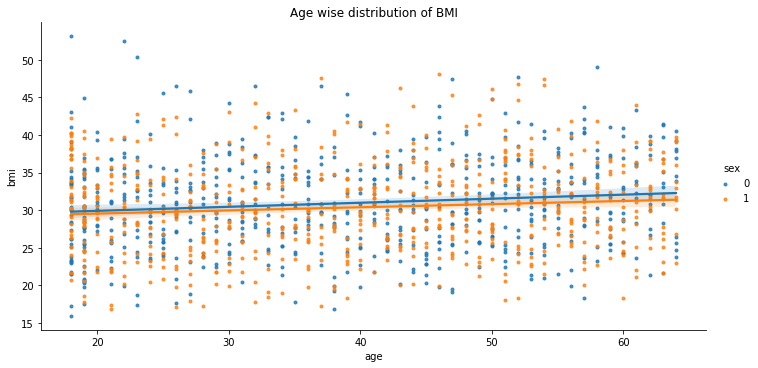

In [41]:
ax= plt.figure(figsize=(15,6))
sb.lmplot(x='age', y= 'bmi',data=df,markers='.',hue='sex',height=5,aspect=2)
plt.title('Age wise distribution of BMI')

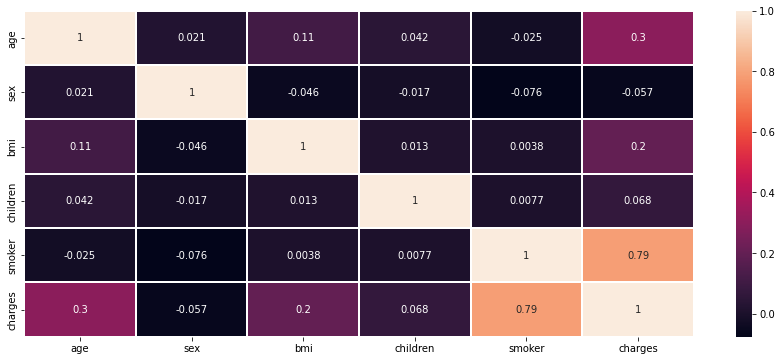

In [42]:
heatmap=df.corr()
ax= plt.figure(figsize=(15,6))
sb.heatmap(heatmap,linewidths=1,linecolor='white',annot=True)

Prepare Dataset for training

In [44]:
df.drop(['region'], axis =1, inplace=True)

In [58]:
# define function to treat outliers using Z-score method
def treat_outliers_zscore(df, col_name, threshold=3):
    mean = np.mean(df[col_name])
    std = np.std(df[col_name])
    z_score = np.abs((df[col_name] - mean) / std)
    df = df[z_score <= threshold]
    return df

# apply outlier treatment to each column
df = treat_outliers_zscore(df, 'age')
df = treat_outliers_zscore(df, 'bmi')


# print the resulting dataframe
print(df)

      age  sex     bmi  children  smoker      charges
0      19    1  27.900         0       1  16884.92400
1      18    0  33.770         1       0   1725.55230
2      28    0  33.000         3       0   4449.46200
3      33    0  22.705         0       0  21984.47061
4      32    0  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    0  30.970         3       0  10600.54830
1334   18    1  31.920         0       0   2205.98080
1335   18    1  36.850         0       0   1629.83350
1336   21    1  25.800         0       0   2007.94500
1337   61    1  29.070         0       1  29141.36030

[1334 rows x 6 columns]


In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [60]:
scaled = scaler.fit_transform(df)
print(scaled)

[[-1.44224939  1.00752456 -0.4503585  -0.90929905  1.97140734  0.29948374]
 [-1.51352831 -0.99253164  0.5281905  -0.08017743 -0.50725184 -0.95489799]
 [-0.80073908 -0.99253164  0.39982888  1.57806581 -0.50725184 -0.72950457]
 ...
 [-1.51352831  1.00752456  1.041637   -0.90929905 -0.50725184 -0.96281836]
 [-1.29969154  1.00752456 -0.80043566 -0.90929905 -0.50725184 -0.93153104]
 [ 1.55146537  1.00752456 -0.25531552 -0.90929905  1.97140734  1.31365834]]


In [61]:
x=df[['age','bmi','children']]
y=df['charges']

In [62]:
x1= sm.add_constant(x)
results = sm.OLS(y,x1)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     61.14
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.96e-37
Time:                        16:40:42   Log-Likelihood:                -14346.
No. Observations:                1334   AIC:                         2.870e+04
Df Residuals:                    1330   BIC:                         2.872e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7027.3154   1768.798     -3.973      0.000   -1.05e+04   -3557.377
age          240.6068     22.319     10.780      0.000     196.822     284.392
bmi          335.7186     52.161      6.436      0.000     233.392     438.045
children     528.3890    257.820      2.049      0.041      22.611    1034.167
==============================================================================
Omnibus:                      325.094   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.602
Skew:                           1.522   Prob(JB):                    8.50e-132
Kurtosis:                       4.262   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
xs =df['smoker']
xs1=xs.values.reshape(-1,1)

Create and train Linear Regression model and Make Prediction.

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Split data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
tarin_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train score: {train_score:.2f}, Test score: {test_score:.2f}")

Train score: 0.61, Test score: 0.78


In [84]:
print('The accuracy on the training data:',model.score(X_train, y_train).round(3))
print('The accuracy on the testing data:',model.score(X_test, y_test).round(3))
print(' ')

The accuracy on the training data: 0.739
The accuracy on the testing data: 0.783
 


In [82]:
y_pred1=model.predict(X_train)
y_pred2=model.predict(X_test)

Plot training and testing error

37029207.25903559
35040185.77909961


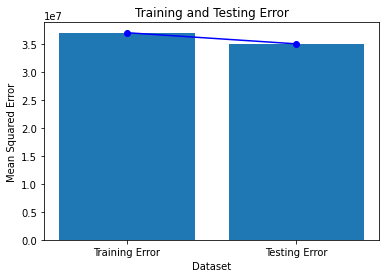

In [83]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(train_error)
print(test_error)

# Plot the training and testing error
plt.bar(['Training Error', 'Testing Error'], [train_error, test_error],)
plt.plot(['Training Error', 'Testing Error'], [train_error, test_error], 'bo-')
plt.title('Training and Testing Error')
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.show()






**OBSERVATION**

1- This model is relatively accurate, with over 74% accuracy in training data and 78% Accuracy in  testing data.

2- Smokers have somewhat higher bills but these charges might not be due to health problems caused due to smoking.

3- Error differnce in between training and testing data is less as we can see in bar chart.